In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [51]:
#broderick path information
subj='sub-wlsubj001'
broderick_dir = '/Volumes/server/Projects/sfp_nsd/Broderick_dataset'
stim_info = os.path.join(broderick_dir, 'stimuli', 'task-sfprescaled_stim_description.csv')
lh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_varea.mgz')
lh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_eccen.mgz')
lh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_angle.mgz')
lh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_sigma.mgz')
lh_prf_path_list = [lh_eccentricity_path, lh_angle_path, lh_sigma_path, lh_varea_path]

rh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_varea.mgz')
rh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_eccen.mgz')
rh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_angle.mgz')
rh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_sigma.mgz')
rh_prf_path_list = [rh_eccentricity_path, rh_angle_path, rh_sigma_path, rh_varea_path]

betas_path = os.path.join(broderick_dir, 'derivatives', 'GLMdenoise', f'{subj}_ses-04_task-sfprescaled_results.mat')

# Load stimulus information

In [52]:
stim_info = brod.load_broderick_stim_info(stim_info)

In [53]:
mask = brod.make_lh_rh_masks(lh_varea_path, rh_varea_path,
                             lh_eccentricity_path, rh_eccentricity_path,
                             roi="V1", eccen_range=[1, 12])

In [180]:
prf_df = brod.load_lh_rh_prf_proporties_as_df(lh_prf_path_list, 
                                              rh_prf_path_list, 
                                              lh_mask=mask['lh'], rh_mask=mask['rh'], angle_to_radians=True)

In [61]:
betas_df = brod.load_betas_as_df(betas_path, mask, results_names=['models'])

(240885, 48, 100)


In [62]:
betas_df

{'lh':          voxel  class_idx  bootstraps     betas
 0            0          0           0  1.786868
 1            0          0           1  1.799573
 2            0          0           2  1.820887
 3            0          0           3  2.107070
 4            0          0           4  1.487799
 ...        ...        ...         ...       ...
 8553595   1781         47          95  5.409488
 8553596   1781         47          96  6.597688
 8553597   1781         47          97  5.876988
 8553598   1781         47          98  4.704140
 8553599   1781         47          99  5.758471
 
 [8553600 rows x 4 columns],
 'rh':           voxel  class_idx  bootstraps     betas
 0             0          0           0  1.790975
 1             0          0           1  1.807808
 2             0          0           2  2.182446
 3             0          0           3  2.270863
 4             0          0           4  1.852887
 ...         ...        ...         ...       ...
 10684795   2225   

In [169]:
prf_betas_df = brod.merge_prf_and_betas(prf_df, betas_df)
prf_betas_df = brod.concat_lh_and_rh_df(prf_betas_df)

In [177]:
df = brod.merge_stim_df_and_betas_df(prf_betas_df, stim_df, on='class_idx')

In [186]:
df['local_ori'] = prep.calculate_local_orientation(df['w_a'], df['w_r'], df['eccentricity'], angle_in_radians=True, reference_frame='relative')

In [187]:
df['local_sf'], df['local_ori'] = prep.calculate_local_stim_properties(df['w_a'], df['w_r'], 
                                     df['eccentricity'], df['angle'], angle_in_radians=False, reference_frame='relative')

In [36]:

broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
subj_list = [utils.sub_number_to_string(sn, dataset="broderick") for sn in broderick_sn_list]

In [65]:
roi='V1'
for sub in subj_list[:1]:
    subj=f'sub-{sub}'
    broderick_dir = '/Volumes/server/Projects/sfp_nsd/Broderick_dataset'
    stim_info_path = os.path.join(broderick_dir, 'stimuli', 'task-sfprescaled_stim_description.csv')
    lh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_varea.mgz')
    lh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_eccen.mgz')
    lh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_angle.mgz')
    lh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'lh.inferred_sigma.mgz')
    lh_prf_path_list = [lh_eccentricity_path, lh_angle_path, lh_sigma_path, lh_varea_path]
    
    rh_varea_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_varea.mgz')
    rh_eccentricity_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_eccen.mgz')
    rh_angle_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_angle.mgz')
    rh_sigma_path=os.path.join(broderick_dir, 'derivatives', 'prf_solutions', subj, 'bayesian_posterior', 'rh.inferred_sigma.mgz')
    rh_prf_path_list = [rh_eccentricity_path, rh_angle_path, rh_sigma_path, rh_varea_path]
    
    betas_path = os.path.join(broderick_dir, 'derivatives', 'GLMdenoise', f'{subj}_ses-04_task-sfprescaled_results.mat')
    bd_df = brod.make_broderick_sf_dataframe(stim_info_path,
                                            lh_varea_path, rh_varea_path, 
                                            lh_eccentricity_path, rh_eccentricity_path,
                                            lh_prf_path_list, rh_prf_path_list,
                                            betas_path,
                                            eccen_range=[1,12], roi="V1",
                                            angle_to_radians=True,
                                            reference_frame='relative',
                                            results_names=['modelmd'])
    bd_df = vs.select_voxels(bd_df, drop_by='pRFcenter',
                              inner_border=1, outer_border=12,
                              to_group=['voxel'], return_voxel_list=False)
    bd_dir_save = '/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/broderick'
    #bd_df.to_csv(os.path.join(bd_dir_save, f'dset-broderick_{subj}_roi-{roi}'))

(240885, 48)


In [43]:
bd_df.hemi.unique()

array(['lh', 'rh'], dtype=object)

In [27]:
answer = pd.DataFrame({'hemi': ['lh','lh','lh','lh','lh'], 'angle': [90, 135, 180, 225, 270]})
answer = answer.append(pd.DataFrame({'hemi': ['rh','rh','rh','rh','rh'], 'angle': [90, 45, 360, 315, 270]}))
answer

,hemi,angle
0,lh,90
1,lh,135
2,lh,180
3,lh,225
4,lh,270
0,rh,90
1,rh,45
2,rh,360
3,rh,315
4,rh,270


In [18]:
test = pd.DataFrame({'hemi': ['lh','lh','lh','lh','lh'], 'angle': [0, 45, 90, 135, 180]})
test = test.append(pd.DataFrame({'hemi': ['rh','rh','rh','rh','rh'], 'angle': [0, 45, 90, 135, 180]}))
test

,hemi,angle
0,lh,0
1,lh,45
2,lh,90
3,lh,135
4,lh,180
0,rh,0
1,rh,45
2,rh,90
3,rh,135
4,rh,180


In [22]:
test['new_angle_-90'] = test.apply(brod._transform_angle, axis=1)

In [24]:
test['new_angle_+90'] = test.apply(brod._transform_angle_corrected, axis=1)

In [28]:
pd.concat((test,answer), axis=1)

,hemi,angle,new_angle_-90,new_angle_+90,hemi,angle
0,lh,0,270,90,lh,90
1,lh,45,315,135,lh,135
2,lh,90,0,180,lh,180
3,lh,135,45,225,lh,225
4,lh,180,90,270,lh,270
0,rh,0,270,90,rh,90
1,rh,45,225,45,rh,45
2,rh,90,180,0,rh,360
3,rh,135,135,315,rh,315
4,rh,180,90,270,rh,270


In [70]:
np.rad2deg(0.216418)

12.39983801066225

In [90]:
noah_angles = np.flip(np.arange(0,90))

ValueError: operands could not be broadcast together with shapes (90,) (180,) (90,) 

In [133]:
ground_truth = np.arange(0, 360)
noah_angles = np.flip(np.arange(0,90))
noah_angles = np.concatenate((noah_angles, np.arange(0,180)))
noah_angles = np.concatenate((noah_angles, np.flip(np.arange(90,180))))

adjusted_noah_angles = np.flip(np.arange(0,90))
adjusted_noah_angles = np.concatenate((adjusted_noah_angles, np.flip(np.arange(-180,0))))
adjusted_noah_angles = np.concatenate((adjusted_noah_angles, np.flip(np.arange(90,180))))

billy_angles = np.mod((adjusted_noah_angles-90), 360)

corrected_angles = np.arange(-90,0)
corrected_angles = np.concatenate((corrected_angles, np.arange(0,180)))
corrected_angles = np.concatenate((corrected_angles, np.arange(-180,-90)))
corrected_angles = np.mod((corrected_angles+90), 360)

In [99]:
noah_angles[::36]

array([ 89,  53,  17,  18,  54,  90, 126, 162, 161, 125])

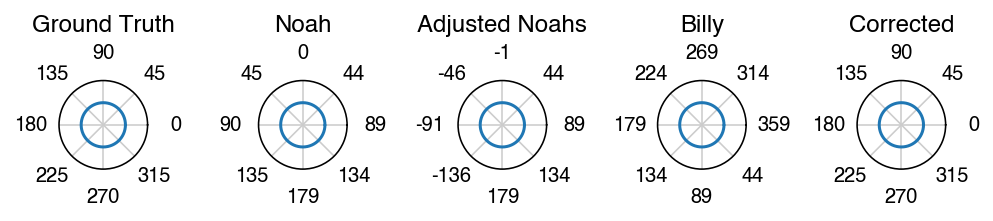

In [135]:
import matplotlib.pyplot as plt
import matplotlib as mpl

rc = {'text.color': 'black',
      'axes.labelcolor': 'black',
      'xtick.color': 'black',
      'ytick.color': 'black',
      'axes.edgecolor': 'black',
      'font.family': 'Helvetica',
      'figure.dpi': 72 * 2,
      'savefig.dpi': 72 * 4
      }
mpl.rcParams.update(rc)

every=45
fig, axes = plt.subplots(1,5, figsize=(7, 5), subplot_kw=dict(polar=True))

for i in range(5):
    # Remove all x and y ticks
    axes[i].set_xticks([])  # Remove x ticks (theta)
    axes[i].set_yticks([])  # Remove y ticks (r)
    axes[i].plot(np.deg2rad(ground_truth), [1]*360)
    axes[i].set_xticks(np.deg2rad(ground_truth)[::every])

axes[0].set_title('Ground Truth')
axes[1].set_title('Noah')
axes[2].set_title('Adjusted Noahs')
axes[3].set_title('Billy')
axes[4].set_title('Corrected')
axes[0].set_xticklabels(ground_truth[::every])
axes[1].set_xticklabels(noah_angles[::every])
axes[2].set_xticklabels(adjusted_noah_angles[::every])
axes[3].set_xticklabels(billy_angles[::every])
axes[4].set_xticklabels(corrected_angles[::every])

plt.tight_layout()

In [123]:
prf_dict = {}
prf_dict['lh_angle'] = [0, 45, 90, 135, 180]
prf_dict['rh_angle'] = [0, 45, 90, 135, 180]

brod.prf_mgzs_to_df(prf_dict, angle_to_radians=False, transform_func=brod._transform_angle_baseline)

lh
Before transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []
After transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []
rh
Before transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []
After transformation
Empty DataFrame
Columns: [voxel, angle]
Index: []


{'lh':    voxel  angle hemi
 0      0     90   lh
 1      1     45   lh
 2      2      0   lh
 3      3    315   lh
 4      4    270   lh,
 'rh':    voxel  angle hemi
 0      0     90   rh
 1      1    135   rh
 2      2    180   rh
 3      3    225   rh
 4      4    270   rh}

In [ ]:
prf